### Read data from CSV files

In [1]:
import pandas as pd

In [2]:
base_directory = './data/eda/Luas Panen, Produktivitas, dan Produksi Padi Menurut Provinsi/'

In [3]:
df_2020 = pd.read_csv(f"{base_directory}2020.csv", encoding='utf-8')
df_2020.head()

,Provinsi,Luas Panen Tanaman Padi (ha) (Ha),Produktivitas Tanaman Padi (ku/ha) (Ku/ha),Rekap Produksi Padi (ton) (Ton)
0,Aceh,317869.41,55.28,1757313.07
1,Sumatera Utara,388591.22,52.51,2040500.19
2,Sumatera Barat,295664.47,46.92,1387269.29
3,Riau,64733.13,37.64,243685.04
4,Jambi,84772.93,45.58,386413.49


In [4]:
df_2020.tail()

,Provinsi,Luas Panen Tanaman Padi (ha) (Ha),Produktivitas Tanaman Padi (ku/ha) (Ku/ha),Rekap Produksi Padi (ton) (Ton)
34,Indonesia,10657274.96,51.28,54649202.24
35,NaN,NaN,NaN,NaN
36,Catatan,NaN,NaN,NaN
37,<sup>1</sup> Kualitas produksi gabah kering g...,NaN,NaN,NaN
38,</i><sup>2</sup> Luas panen dan produksi padi...,NaN,NaN,NaN


### Load data and remove NaN rows

In [5]:
def load_and_clean_data(year):
    df = pd.read_csv(f"{base_directory}{year}.csv", encoding='utf-8')
    df = df.dropna()
    df = df.rename(columns={
        'Provinsi': 'provinsi',
        'Luas Panen Tanaman Padi (ha) (Ha)': 'luas_panen_tanaman_padi(ha)',
        'Produktivitas Tanaman Padi (ku/ha) (Ku/ha)': 'produktivitas_tanaman_padi(ku/ha)',
        'Rekap Produksi Padi (ton) (Ton)': 'produksi_padi(ton)',
    })
    df['tahun'] = year
    return df

In [6]:
df_2020 = load_and_clean_data(2020)
df_2020.head()

,provinsi,luas_panen_tanaman_padi(ha),produktivitas_tanaman_padi(ku/ha),produksi_padi(ton),tahun
0,Aceh,317869.41,55.28,1757313.07,2020
1,Sumatera Utara,388591.22,52.51,2040500.19,2020
2,Sumatera Barat,295664.47,46.92,1387269.29,2020
3,Riau,64733.13,37.64,243685.04,2020
4,Jambi,84772.93,45.58,386413.49,2020


In [7]:
df_2020.tail()

,provinsi,luas_panen_tanaman_padi(ha),produktivitas_tanaman_padi(ku/ha),produksi_padi(ton),tahun
30,Maluku,28668.22,38.53,110447.30,2020
31,Maluku Utara,10301.91,42.11,43382.85,2020
32,Papua Barat,7570.63,32.20,24378.33,2020
33,Papua,52727.52,31.48,166002.30,2020
34,Indonesia,10657274.96,51.28,54649202.24,2020


In [8]:
df_2021 = load_and_clean_data(2021)
df_2022 = load_and_clean_data(2022)
df_2023 = load_and_clean_data(2023)
df_2024 = load_and_clean_data(2024)

### Create a combined dataset

In [9]:
df_combined = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)
df_combined.head()

,provinsi,luas_panen_tanaman_padi(ha),produktivitas_tanaman_padi(ku/ha),produksi_padi(ton),tahun
0,Aceh,317869.41,55.28,1757313.07,2020
1,Sumatera Utara,388591.22,52.51,2040500.19,2020
2,Sumatera Barat,295664.47,46.92,1387269.29,2020
3,Riau,64733.13,37.64,243685.04,2020
4,Jambi,84772.93,45.58,386413.49,2020


In [10]:
df_combined.tail()

,provinsi,luas_panen_tanaman_padi(ha),produktivitas_tanaman_padi(ku/ha),produksi_padi(ton),tahun
178,Papua,1068.57,43.14,4609.95,2024
179,Papua Selatan,47168.57,46.17,217789.62,2024
180,Papua Tengah,1436.12,42.28,6072.38,2024
181,Papua Pegunungan,9.66,43.87,42.38,2024
182,Indonesia,10046135.36,52.90,53142726.65,2024


### Plot Indonesia's paddy productivity data throughout the years

In [11]:
import matplotlib.pyplot as plt

In [12]:
df_indonesia_paddy = df_combined.where(df_combined['provinsi'] == 'Indonesia')
df_indonesia_paddy.dropna(inplace=True)
df_indonesia_paddy

,provinsi,luas_panen_tanaman_padi(ha),produktivitas_tanaman_padi(ku/ha),produksi_padi(ton),tahun
34,Indonesia,10657274.96,51.28,54649202.24,2020.0
69,Indonesia,10411801.22,52.26,54415294.22,2021.0
104,Indonesia,10452671.88,52.38,54748977.08,2022.0
143,Indonesia,10213705.17,52.85,53980993.19,2023.0
182,Indonesia,10046135.36,52.90,53142726.65,2024.0


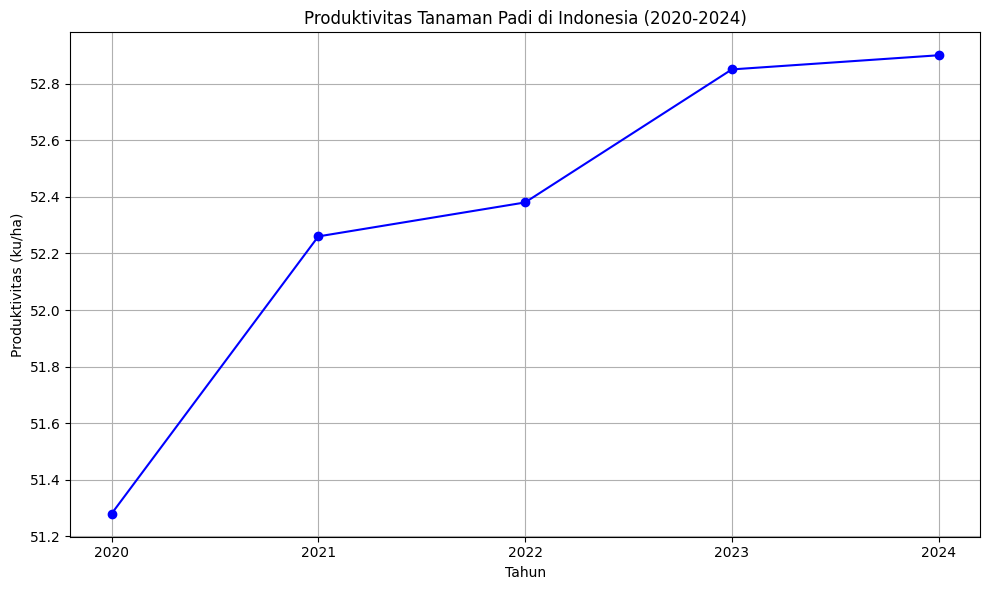

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df_indonesia_paddy['tahun'], df_indonesia_paddy['produktivitas_tanaman_padi(ku/ha)'], marker='o', linestyle='-', color='b')
plt.title('Produktivitas Tanaman Padi di Indonesia (2020-2024)')
plt.xlabel('Tahun')
plt.ylabel('Produktivitas (ku/ha)')
plt.xticks(df_indonesia_paddy['tahun'])
plt.grid()
plt.tight_layout()
plt.show()

In [14]:
productivity_2020 = df_indonesia_paddy[df_indonesia_paddy['tahun'] == 2020]['produktivitas_tanaman_padi(ku/ha)'].values[0]
productivity_2024 = df_indonesia_paddy[df_indonesia_paddy['tahun'] == 2024]['produktivitas_tanaman_padi(ku/ha)'].values[0]
difference = productivity_2024 - productivity_2020
difference_percentage = round((difference / productivity_2020) * 100, 2)
difference = round(difference, 2)
print(f"Produktivitas Tanaman Padi di Indonesia meningkat sebesar {difference} ku/ha dari 2020 ke 2024, yaitu sekitar {difference_percentage}%")

Produktivitas Tanaman Padi di Indonesia meningkat sebesar 1.62 ku/ha dari 2020 ke 2024, yaitu sekitar 3.16%


Indonesia's paddy productivity per hectare seems to be increasing over the years. Between 2024 and 2020, there is a 3.16% increase in productivity.

### Plot Indonesia's paddy field area data throughout the years

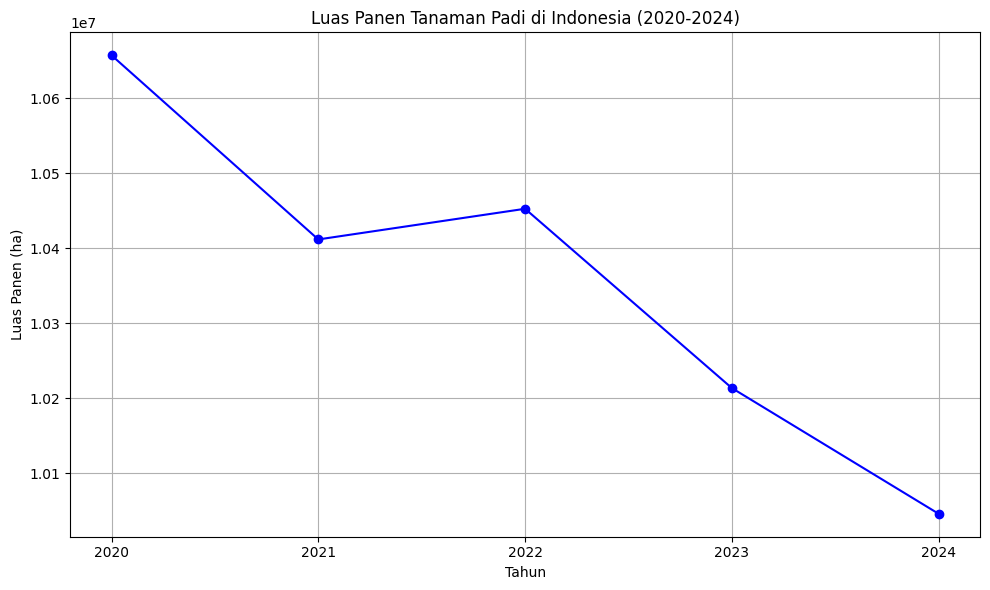

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df_indonesia_paddy['tahun'], df_indonesia_paddy['luas_panen_tanaman_padi(ha)'], marker='o', linestyle='-', color='b')
plt.title('Luas Panen Tanaman Padi di Indonesia (2020-2024)')
plt.xlabel('Tahun')
plt.ylabel('Luas Panen (ha)')
plt.xticks(df_indonesia_paddy['tahun'])
plt.grid()
plt.tight_layout()
plt.show()

In [16]:
harvested_area_2020 = df_indonesia_paddy[df_indonesia_paddy['tahun'] == 2020]['luas_panen_tanaman_padi(ha)'].values[0]
harvested_area_2024 = df_indonesia_paddy[df_indonesia_paddy['tahun'] == 2024]['luas_panen_tanaman_padi(ha)'].values[0]
difference = harvested_area_2024 - harvested_area_2020
difference_percentage = round((difference / harvested_area_2020) * 100, 2)
difference = round(difference, 2)
print(f"Luas Panen Tanaman Padi di Indonesia berkurang sebesar {abs(difference)} ha dari 2020 ke 2024, yaitu sekitar {abs(difference_percentage)}%")

Luas Panen Tanaman Padi di Indonesia berkurang sebesar 611139.6 ha dari 2020 ke 2024, yaitu sekitar 5.73%


Indonesia's paddy harvested area has been decreasing over the years. Between 2024 and 2020, there is a 5.73% decrease in harvested area.

### Plot Indonesia's paddy production data throughout the years

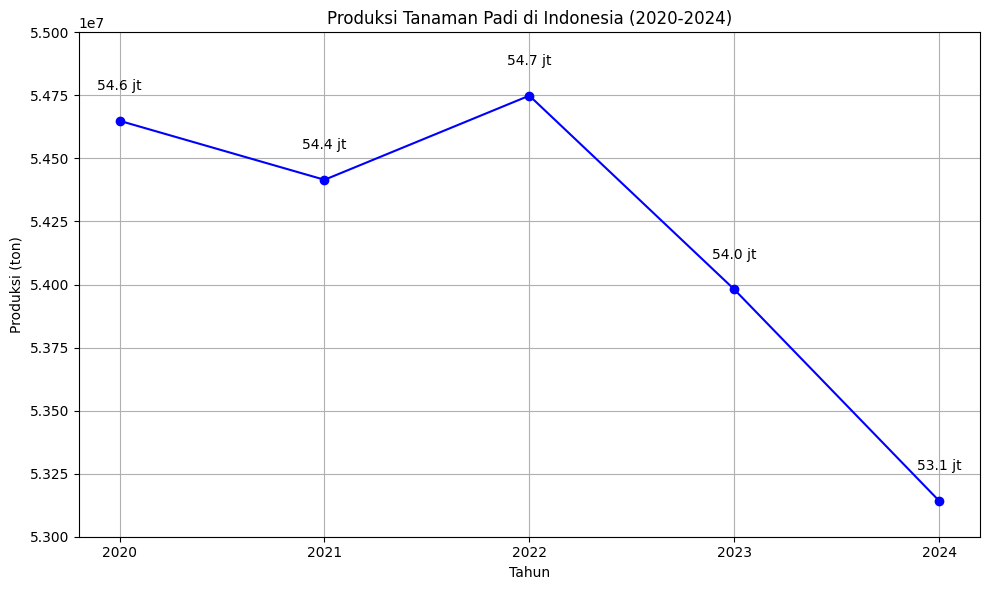

53142726.65
54748977.08


In [54]:
plt.figure(figsize=(10, 6))
plt.plot(df_indonesia_paddy['tahun'], df_indonesia_paddy['produksi_padi(ton)'], marker='o', linestyle='-', color='b')
plt.title('Produksi Tanaman Padi di Indonesia (2020-2024)')
plt.xlabel('Tahun')
plt.ylabel('Produksi (ton)')
plt.xticks(df_indonesia_paddy['tahun'])
plt.grid()

# Compact label in millions (jt)
offset = max(df_indonesia_paddy['produksi_padi(ton)']) * 0.002

# Annotate the data points with compact labels
for i, (x, y) in enumerate(zip(df_indonesia_paddy['tahun'], df_indonesia_paddy['produksi_padi(ton)'])):
    formatted = f'{y/1e6:.1f} jt'  # abbreviated notation
    plt.text(x, y + offset, formatted, ha='center', va='bottom')

plt.ylim([53000000, 55000000])

plt.tight_layout()
plt.show()

print(min(df_indonesia_paddy['produksi_padi(ton)']))
print(max(df_indonesia_paddy['produksi_padi(ton)']))

In [ ]:
production_2020 = df_indonesia_paddy[df_indonesia_paddy['tahun'] == 2020]['produksi_padi(ton)'].values[0]
production_2024 = df_indonesia_paddy[df_indonesia_paddy['tahun'] == 2024]['produksi_padi(ton)'].values[0]
difference = production_2024 - production_2020
difference_percentage = round((difference / production_2020) * 100, 2)
difference = round(difference, 2)
print(f"Produksi Tanaman Padi di Indonesia berkurang sebanyak {abs(difference)} ton dari 2020 ke 2024, yaitu sekitar {abs(difference_percentage)}%")

Produksi Tanaman Padi di Indonesia berkurang sebanyak 1506475.59 ton dari 2020 ke 2024, yaitu sekitar 2.76%


Indonesia's paddy production has dropped over the years. Between 2024 and 2020, there is a 2.76% decrease in production.

### Plot the three metrics together

#### Normalize the data for better comparison

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
df_indonesia_paddy_scaled = df_indonesia_paddy.copy()
scaler = MinMaxScaler()
for column in ['luas_panen_tanaman_padi(ha)', 'produktivitas_tanaman_padi(ku/ha)', 'produksi_padi(ton)']:
    df_indonesia_paddy_scaled[column] = scaler.fit_transform(df_indonesia_paddy[[column]])

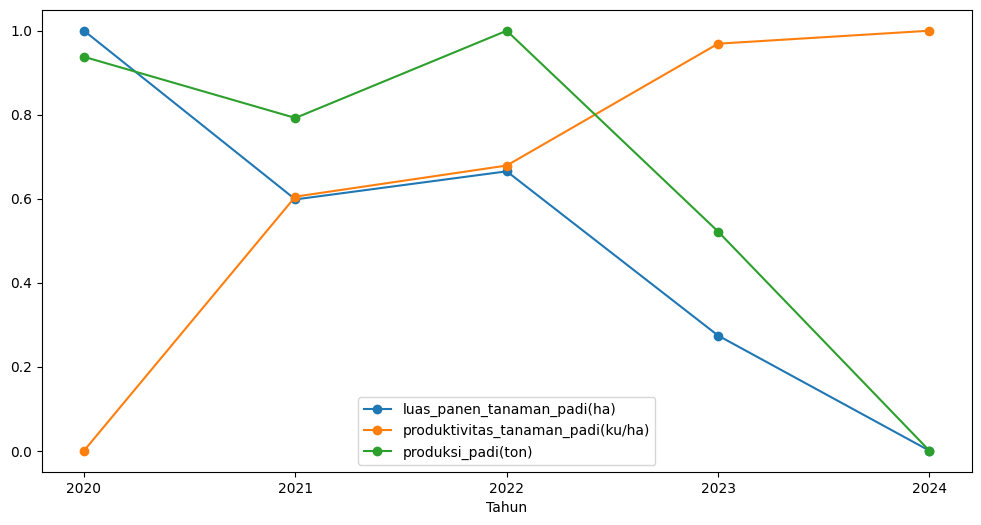

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df_indonesia_paddy_scaled['tahun'], df_indonesia_paddy_scaled['luas_panen_tanaman_padi(ha)'], label='luas_panen_tanaman_padi(ha)', marker='o')
plt.plot(df_indonesia_paddy_scaled['tahun'], df_indonesia_paddy_scaled['produktivitas_tanaman_padi(ku/ha)'], label='produktivitas_tanaman_padi(ku/ha)', marker='o')
plt.plot(df_indonesia_paddy_scaled['tahun'], df_indonesia_paddy_scaled['produksi_padi(ton)'], label='produksi_padi(ton)', marker='o')
plt.xticks(df_indonesia_paddy_scaled['tahun'])
plt.xlabel('Tahun')
plt.legend()
plt.show()

We can see that the paddy harvested area and total production have been decreasing, while the productivity per hectare has been increasing. This suggests that Indonesia is producing more paddy with less area, which could be due to improved agricultural practices or technology.

But, the decrease in harvested area and total production could also be a cause for concern, as it may indicate that the country is facing challenges in paddy farming.

### Correlation plot

In [22]:
import seaborn as sns

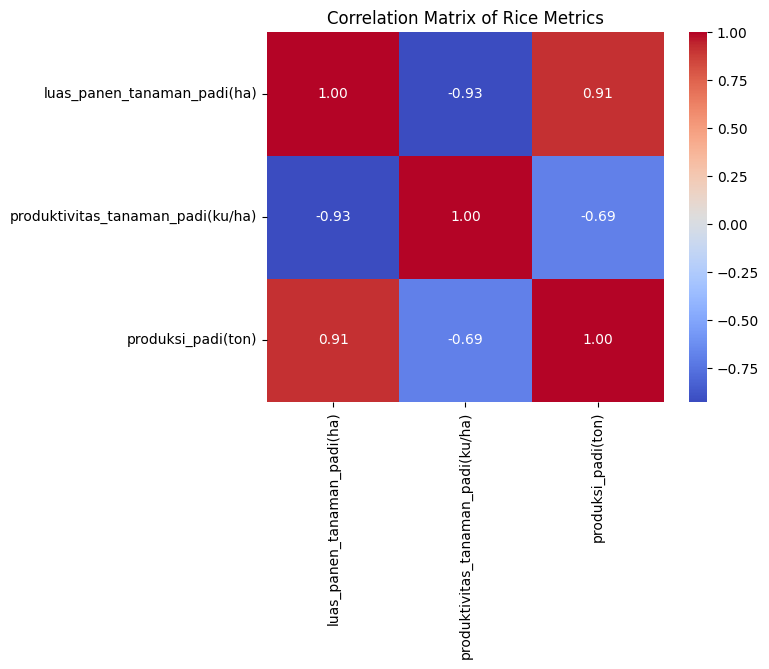

In [23]:
corrleation = df_indonesia_paddy_scaled[['luas_panen_tanaman_padi(ha)', 'produktivitas_tanaman_padi(ku/ha)', 'produksi_padi(ton)']].corr()

sns.heatmap(corrleation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Rice Metrics")
plt.show()

We can see that the harvested area and production has a strong positive correlation. This suggests that as the harvested area increases, production increases.